In [7]:
!pip install numpy 
!pip install opencv-python 
!pip install matplotlib
!pip install tensorflow

In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [9]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [10]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


In [11]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2571 - accuracy: 0.9243
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1063 - accuracy: 0.9667
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0711 - accuracy: 0.9776
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0529 - accuracy: 0.9838
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0409 - accuracy: 0.9864
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0322 - accuracy: 0.9892
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0256 - accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0230 - accuracy: 0.9921
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0170 - accuracy: 0.9939
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.016

In [12]:
model.save('handwritten_model.h5')

In [14]:
model = tf.keras.models.load_model('handwritten_model.h5')

loss, accuracy = model.evaluate(x_test, y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1011 - accuracy: 0.9774
0.10105809569358826
0.977400004863739


1/1 [==============================] - 0s 66ms/step
this digit is probably a 3


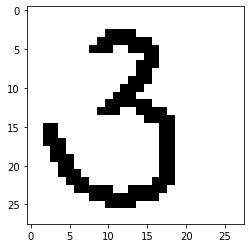

1/1 [==============================] - 0s 18ms/step
this digit is probably a 3


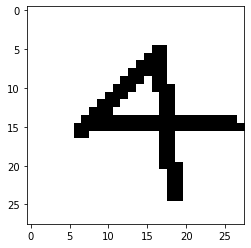

1/1 [==============================] - 0s 18ms/step
this digit is probably a 3


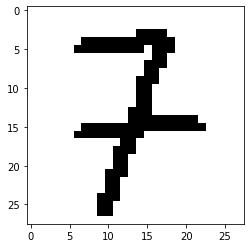

1/1 [==============================] - 0s 17ms/step
this digit is probably a 0


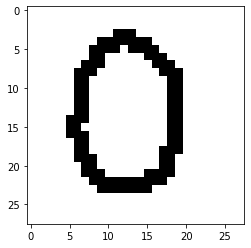

1/1 [==============================] - 0s 19ms/step
this digit is probably a 6


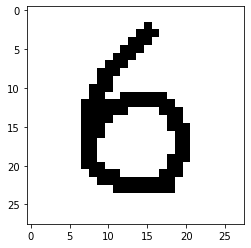

1/1 [==============================] - 0s 20ms/step
this digit is probably a 6


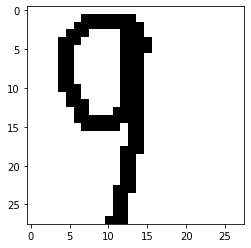

1/1 [==============================] - 0s 18ms/step
this digit is probably a 5


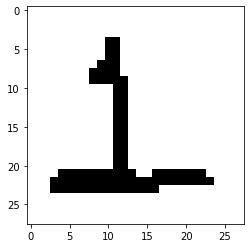

1/1 [==============================] - 0s 21ms/step
this digit is probably a 2


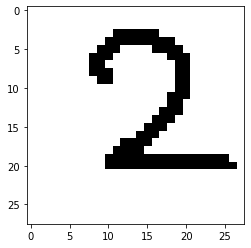

1/1 [==============================] - 0s 16ms/step
this digit is probably a 3


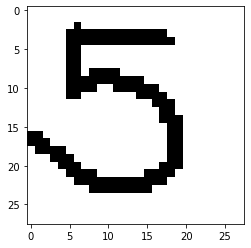

1/1 [==============================] - 0s 18ms/step
this digit is probably a 8


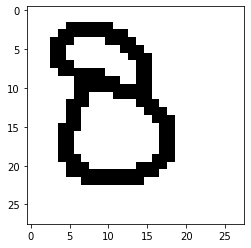

1/1 [==============================] - 0s 17ms/step
this digit is probably a 6


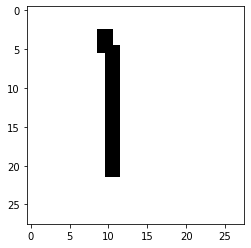

1/1 [==============================] - 0s 17ms/step
this digit is probably a 3


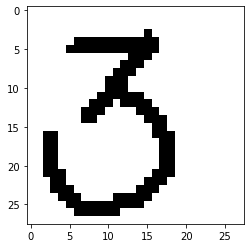

1/1 [==============================] - 0s 24ms/step
this digit is probably a 4


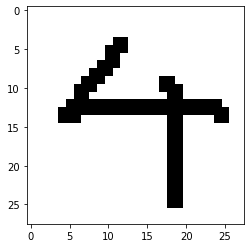

In [19]:
image_number = 1
while os.path.isfile(f"C:/Users/Navneet Yadav/Downloads/resume/Projects/handwritten_digit_recognition/Digits/digit_{image_number}.png"):
                     try:
                         img = cv2.imread(f"C:/Users/Navneet Yadav/Downloads/resume/Projects/handwritten_digit_recognition/Digits/digit_{image_number}.png")[:,:,0]
                         img = np.invert(np.array([img]))
                         prediction = model.predict(img)
                         print(f"this digit is probably a {np.argmax(prediction)}")
                         plt.imshow(img[0], cmap=plt.cm.binary)
                         plt.show()
                     except:
                         print("error!")
                     finally:
                         image_number += 1